In [107]:
import torch.nn as nn
import numpy as np
import copy

class SamplePolicy(nn.Module):
    def __init__(self, src_len, T, K, head_num):
        super(SamplePolicy, self).__init__()
        
        self.src_len = src_len
        self.K = K
        self.T = T
        self.head_num = head_num
        
        #self.counting = np.zeros((batch_size, max_len))
        
    def forward(self, attention_weight):
    
        c = copy.deepcopy(attention_weight)
        c = c.numpy()
        for t in range(self.T):
            counting = torch.zeros((self.src_len))
            
            print(f'counting size {counting.size()}')
            # calculate attention weight
            for h in range(self.head_num):
                candidate = torch.argmax(attention_weight[h], dim=-1)
                

                counting[candidate] += 1
                print(f'candidate {candidate} counting {counting}')
                
            print("---------------------")
            print(counting)
            
            # confusing condition
            if max(counting) <= self.K:
                print("True")
                sampled_head = np.random.randint(low=0, high=self.head_num-1, size=1)
                print(sampled_head)
                #print(attention_weight[sampled_head].unsqueeze(-2).size())
                #plot_confusion_matrix(c[sampled_head])
                plot_confusion_matrix(c)
                #print(f'before attention weight {attention_weight[sampled_head]}')
                attention_weight[:] = attention_weight[sampled_head]
                plot_confusion_matrix(attention_weight.numpy())
        
        return attention_weight

In [3]:
head_num = 8
src_len = 32

In [121]:
# attention weight == (head_num, src_len)
attention_weight = torch.randn((head_num, src_len))

In [122]:
attention_weight = torch.softmax(attention_weight, dim=-1)

In [123]:
from sklearn.metrics import confusion_matrix
import itertools

In [131]:
def plot_confusion_matrix(cm, target_names=None, cmap=None, normalize=True, labels=True, title='Confusion matrix'):
    accuracy = np.trace(cm) / float(np.sum(cm))
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        
    plt.figure(figsize=(30, 10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    
    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names)
        plt.yticks(tick_marks, target_names)
    
    if labels:
        for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
            if normalize:
                plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")
            else:
                plt.text(j, i, "{:,}".format(cm[i, j]),
                         horizontalalignment="center",
                         color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()

In [132]:
attention_weight = attention_weight.numpy()

AttributeError: 'numpy.ndarray' object has no attribute 'numpy'

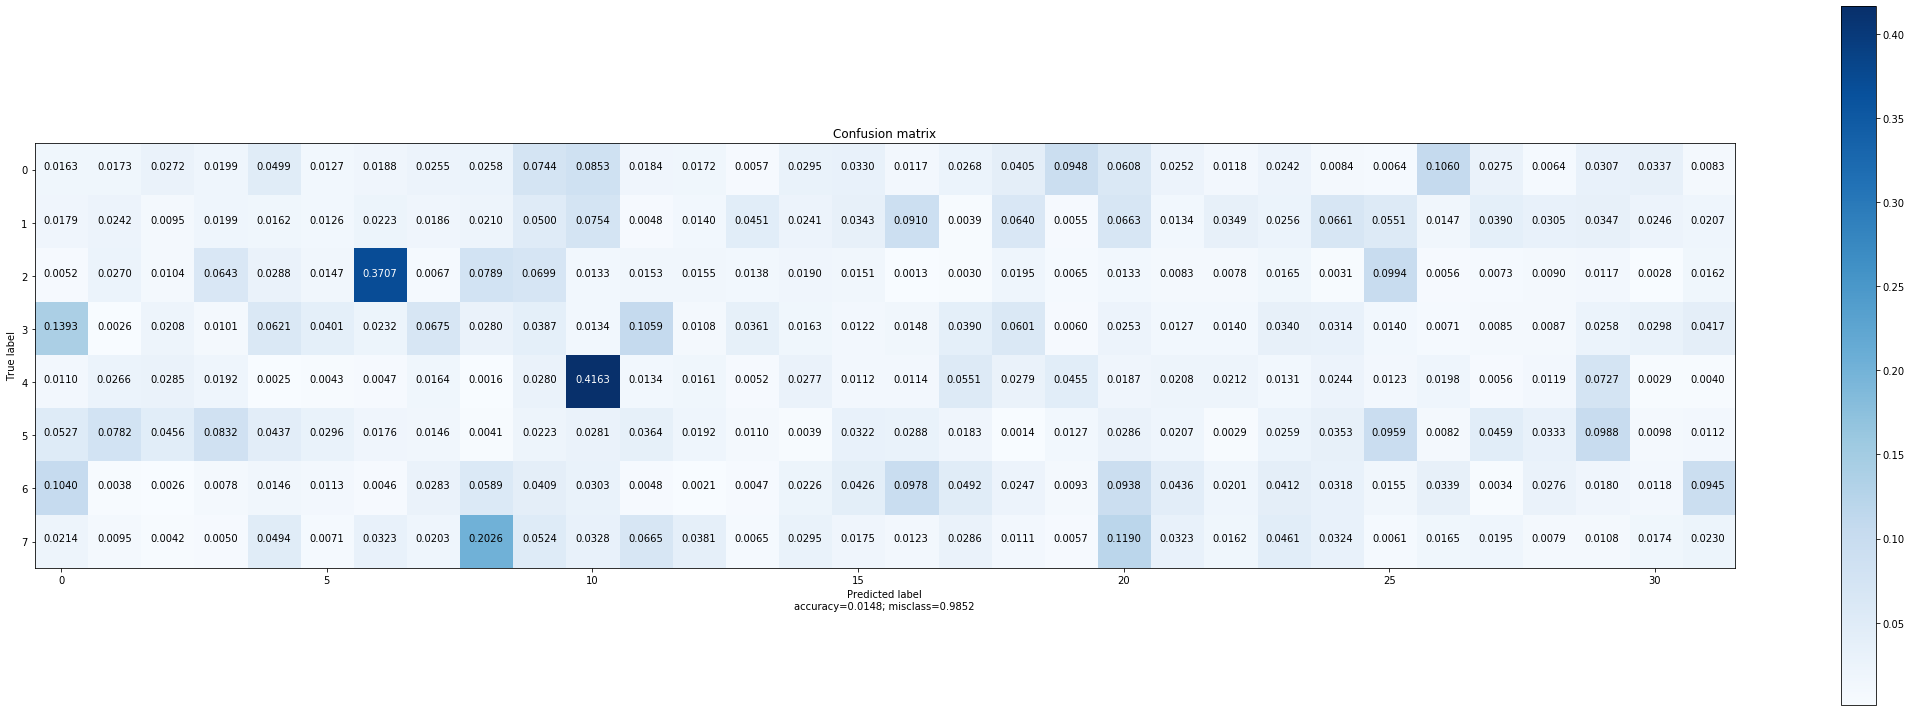

In [133]:
plot_confusion_matrix(attention_weight)

In [134]:
policy = SamplePolicy(src_len, 2, 8, head_num)

In [135]:
attention_weight = torch.FloatTensor(attention_weight)

counting size torch.Size([32])
candidate 26 counting tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
candidate 16 counting tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
candidate 6 counting tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
candidate 0 counting tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
candidate 10 counting tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.])
candidate 29 counting tensor([1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0.

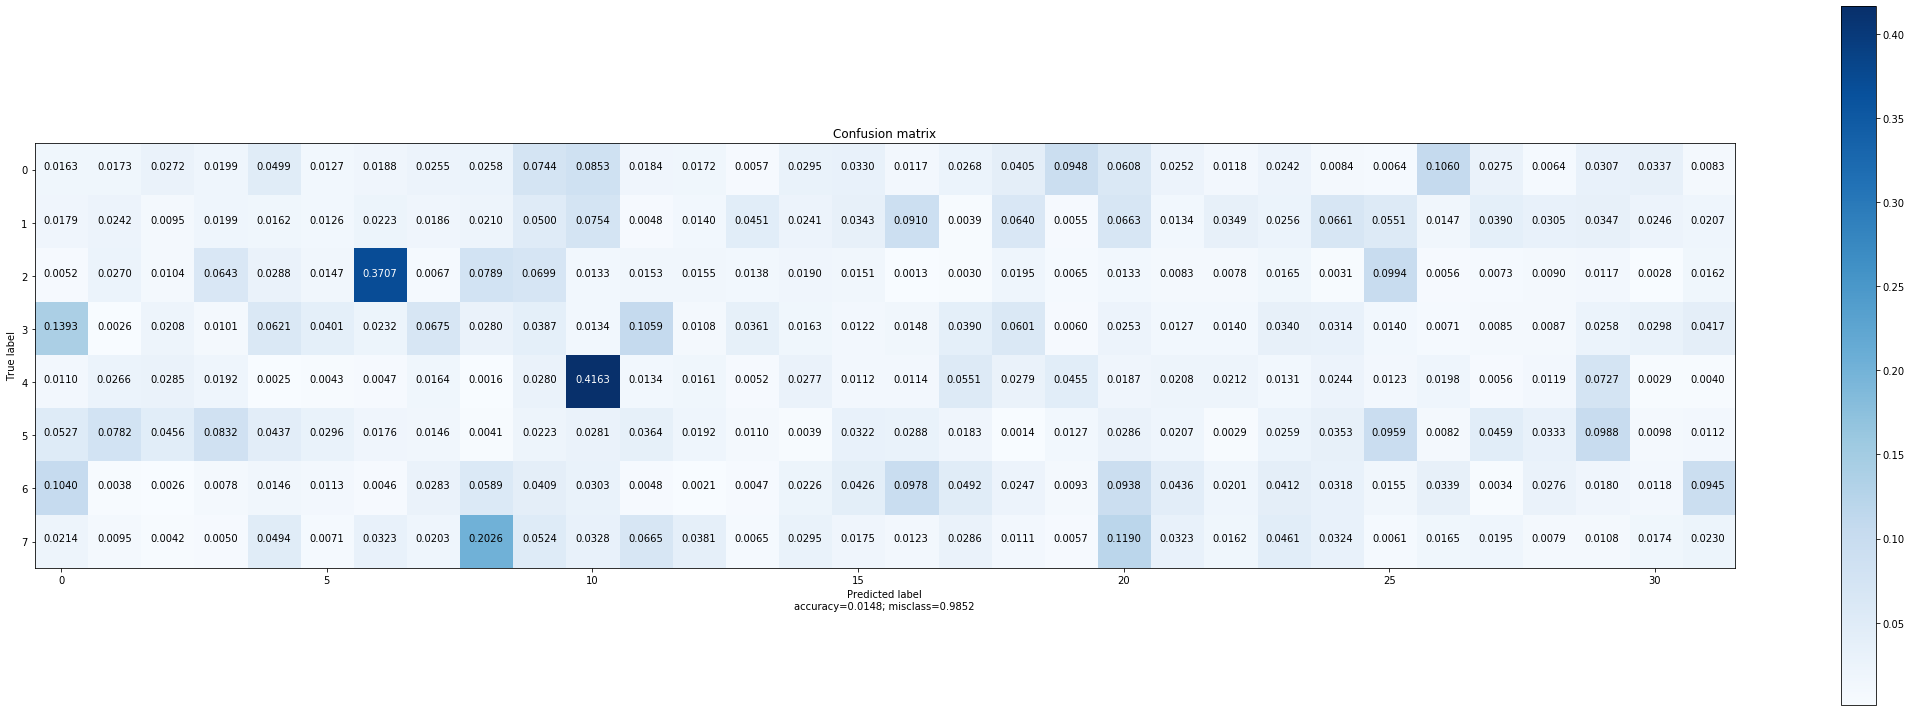

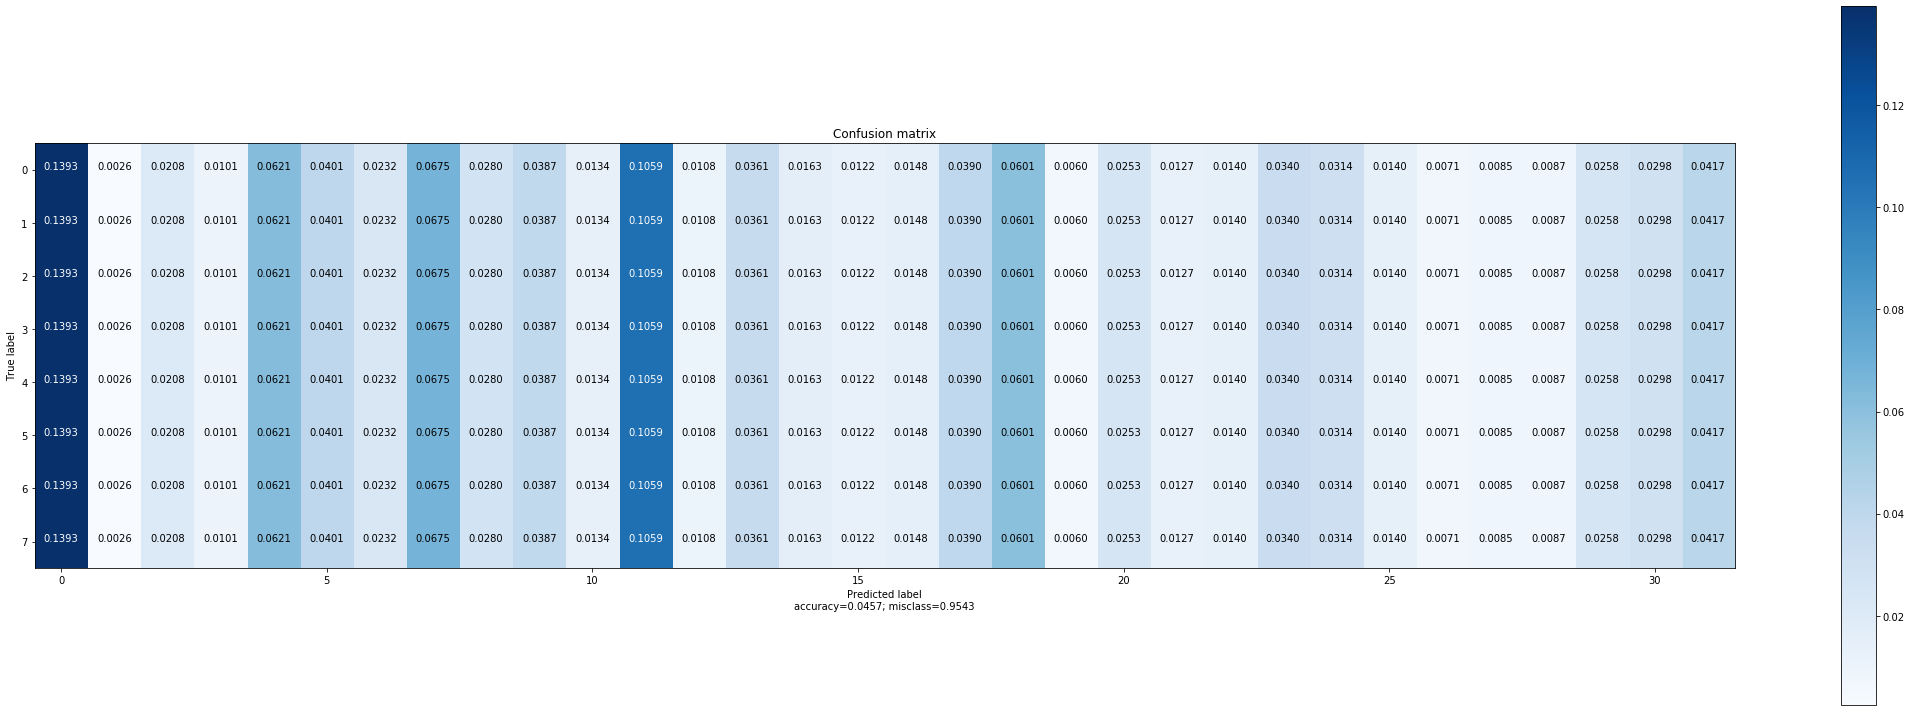

counting size torch.Size([32])
candidate 0 counting tensor([1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
candidate 0 counting tensor([2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
candidate 0 counting tensor([3., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
candidate 0 counting tensor([4., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
candidate 0 counting tensor([5., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])
candidate 0 counting tensor([6., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.

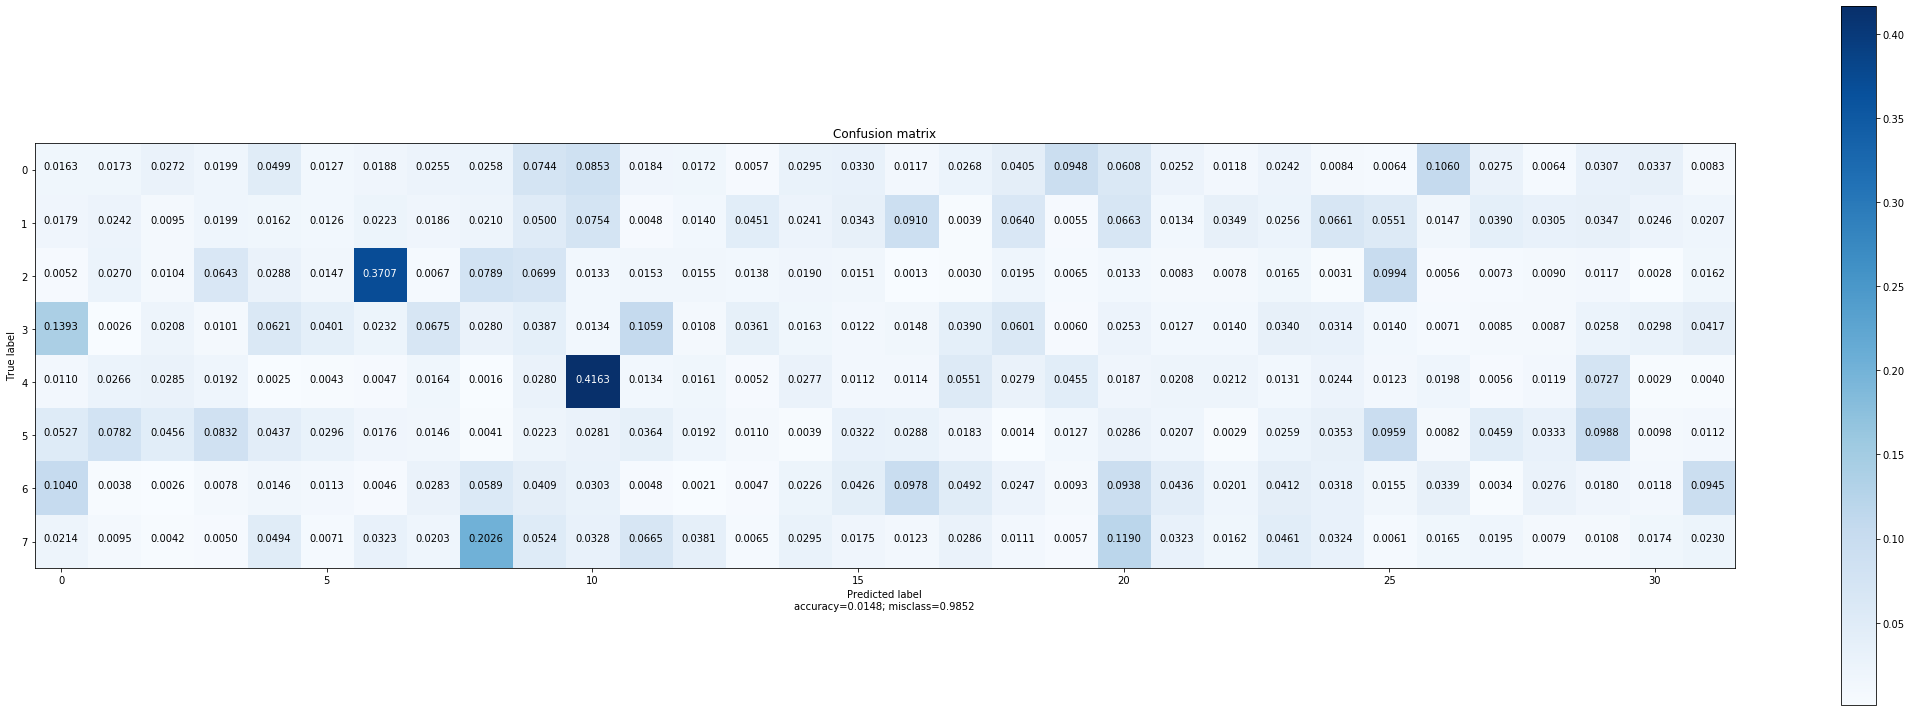

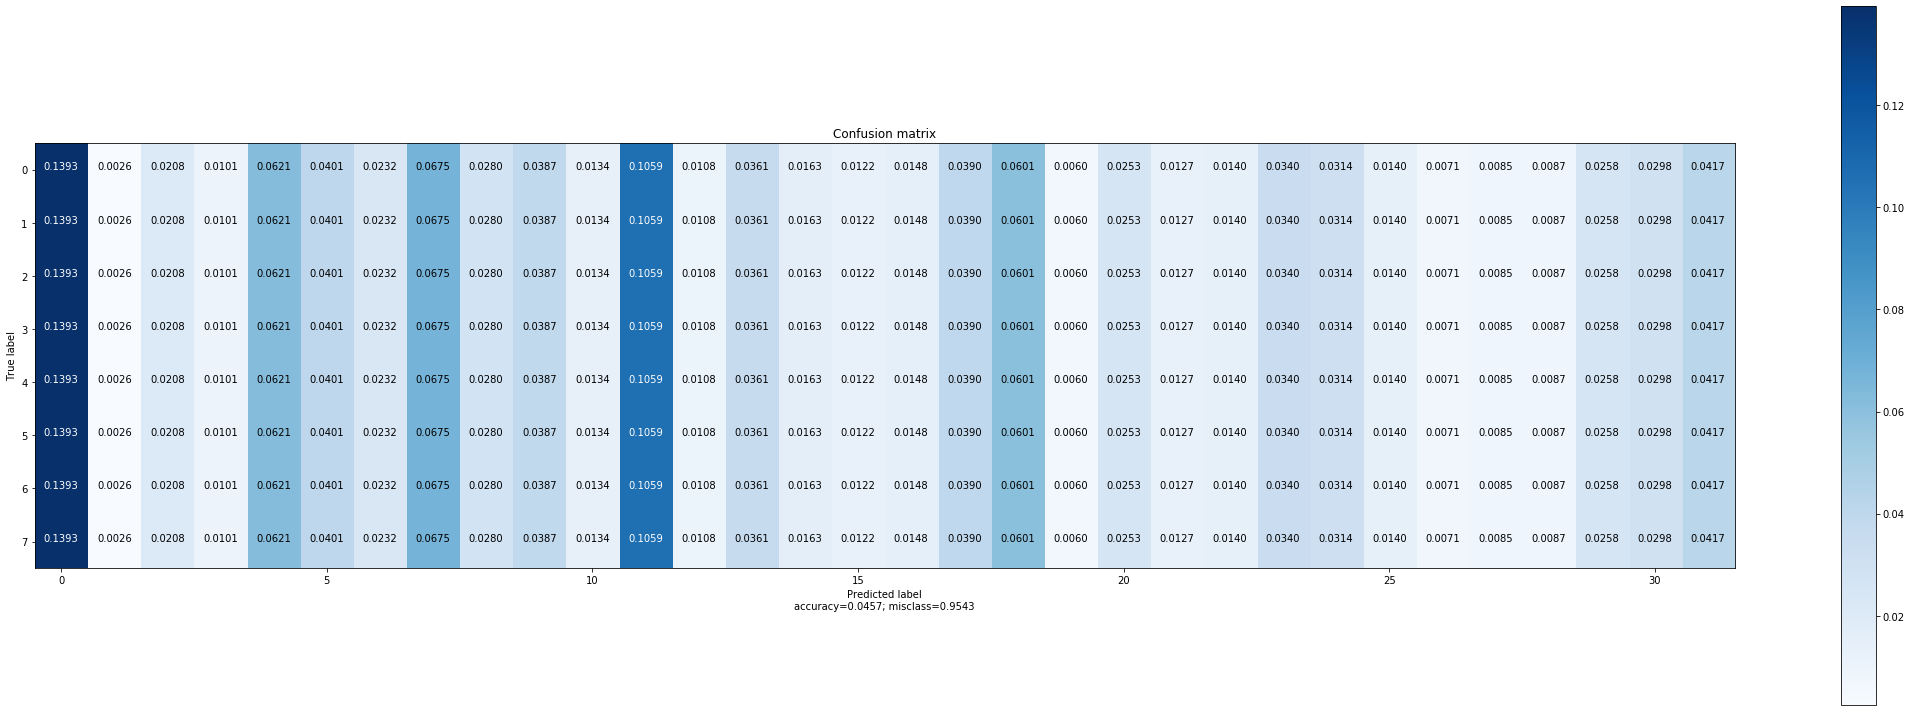

In [136]:
adapted_attention_weight = policy(attention_weight)